### CASE STUDY
Xây dựng ứng dụng "**Quản lý thông tin thú cưng**". Thông tin thú cưng bao gồm những thông tin: 
* mã thú cưng (mỗi giá trị có tính duy nhất, dùng để định danh thú cưng)
* tên thú cưng
* giống/loài
* giới tính 
* màu lông
* năm sinh (định dạng kiểu 'dd/MM/yyyy').   

Ứng dụng có các chức năng cơ bản như sau:
<ol>
    <li>Xem danh mục thông tin thú cưng</li>
    <li>Thêm thông tin thú cưng</li>
    <li>Tìm kiếm thông tin thú cưng</li>
    <li>Sửa thông tin thú cưng</li>
    <li>Xoá thông tin thú cưng</li>
    <li>Sắp xếp danh mục theo tên thú cưng</li>
    <li>Phân loại theo giống/loài</li>
    <li>Lưu danh mục thông tin thú cưng vào file</li>
</ol>

### CASE STUDY: BUỔI 1
Gợi ý về mặt tổng thể kiến trúc của ứng dụng:
* Ứng dụng khi chạy hiển thị menu chức năng (1-8). Khi người dùng nhập số tương ứng với chức năng trên menu thì ứng dụng thực hiện các bước tiếp theo của chức năng đó.
* Menu của ứng dụng có thể như sau:
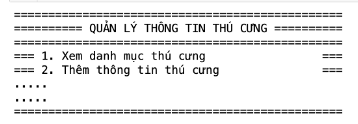
* Thông tin của danh mục thú cưng được lưu trong một list, mỗi phần tử của list là một dictionary lưu thông tin của một thú cưng nhất định,  cấu trúc thông tin có thể như ví dụ sau:
```python
pets = [{'id': 'PET001', 'name': 'Tom', 'species':'Cat', 'gender': 'Male', 'color':'blue', 'date of birth':'23/11/2023'},
        {'id': 'PET002', 'name': 'Jerry', 'species':'Mouse', 'gender': 'Male', 'color':'Brown', 'date of birth':'20/12/2023'},
        {'id': 'PET003', 'name': 'Spike', 'species':'Dog', 'gender': 'Female', 'color':'Gray', 'date of birth':'12/6/2023'}]
```
* Mỗi chức năng của ứng dụng tương ứng với một hàm (function), hàm đó xử lý dữ liệu với list thông tin ở trên. List thông tin (`pets`) có thể là một biến `global` hoặc có thể là biến của hàm.

Hướng dẫn xây dựng hai chức năng đầu tiên của ứng dụng "**Quản lý thông tin thú cưng**":
<ol>
    <li>
        Xem danh mục thông tin thú cưng
        <ul>
            <li>Danh mục thông tin thú cưng có thể được hiển thị dưới dạng bảng, mỗi cột là tương ứng với mỗi trường thông tin của thú cưng</li>
            <li>Nếu hiển thị hết các trường thông tin, nếu bị tràn dòng có thể hiển thị một phần thông tin. Khi đó thêm chức năng hiển thị thông tin chi tiết thú cưng, lúc này thông tin được hiển thị ra hết.</li>
        </ul>
    </li>
    <li>Thêm thông tin thú cưng
        <ul>
            <li>Yêu cầu người dùng nhập từng thông tin thú cưng</li>
            <li>Đối với mã thú cưng, phải kiểm tra sự trùng lặp trước khi thêm vào danh mục.</li>
            <li>Thao tác thành công hay thất bại phải được hiển thị bằng thông báo </li>
        </ul>
    </li>
</ol>

In [2]:
pets = []

id_counter = 1

def line(length=76):
    return "=" * length

def print_header(title):
    title_length = len(title)
    padding_length = (76 - title_length) // 2
    print(line(76))
    print(f"{' ' * padding_length}{title}{' ' * padding_length}")
    print(line(76))

def view_pets():
    print_header("List of Pets:")
    if len(pets) == 0:
        print("No pets available.")
    else:
        for pet in pets:
            print(f"ID: {pet['id']}, Name: {pet['name']}, Species: {pet['species']}, Gender: {pet['gender']}, Color: {pet['color']}, Birthdate: {pet['birthdate']}")

def add_pet():
    global id_counter
    print_header("Adding Pet...")
    id = id_counter
    name = input("Enter the pet's name: ").title()
    species = input("Enter the pet's species: ").title()
    gender = input("Enter the pet's gender: ").title()
    color = input("Enter the pet's color: ").title()
    birthdate = input("Enter the pet's birthdate (dd.mm.yyyy): ").title()
    pets.append({"id": id, "name": name, "species": species, "gender": gender, "color": color, "birthdate": birthdate})
    print(f"\n{name} the {species} has been added!")
    id_counter += 1

def search_pet():
    pet_id = int(input("Enter the pet ID to search: "))
    for pet in pets:
        if pet['id'] == pet_id:
            print(f"ID: {pet['id']}, Name: {pet['name']}, Species: {pet['species']}, Gender: {pet['gender']}, Color: {pet['color']}, Birthdate: {pet['birthdate']}")
            return
    print("Pet not found.")

def edit_pet():
    pet_id = int(input("Enter the pet ID to edit: "))
    for pet in pets:
        if pet['id'] == pet_id:
            pet['name'] = input("Enter the new name: ").title()
            pet['species'] = input("Enter the new species: ").title()
            pet['gender'] = input("Enter the new gender: ").title()
            pet['color'] = input("Enter the new color: ").title()
            pet['birthdate'] = input("Enter the new birthdate (dd.mm.yyyy): ").title()
            print(f"Pet ID {pet_id} has been updated.")
            return
    print("Pet not found.")

def delete_pet():
    pet_id = int(input("Enter the pet ID to delete: "))
    for pet in pets:
        if pet['id'] == pet_id:
            confirmation = input(f"Are you sure you want to delete {pet['name']} the {pet['species']}? (yes/no): ").lower()
            if confirmation == 'yes':
                pets.remove(pet)
                print(f"Pet ID {pet_id} has been deleted.")
            else:
                print("Deletion cancelled.")
            return
    print("Pet not found.")

def sort_pets():
    criteria = input("Enter the criteria to sort by (name, species, gender, color, birthdate): ").lower()
    if criteria in ['name', 'species', 'gender', 'color', 'birthdate']:
        pets.sort(key=lambda pet: pet[criteria])
        print(f"Pets have been sorted by {criteria}.")
    else:
        print("Invalid sorting criteria. Please choose from name, species, gender, color, or birthdate.")

print_header("PET MANAGEMENT")

while True:
    print_header("Options")
    options = [
        "1. View Pets",
        "2. Add Pet",
        "3. Search Pet",
        "4. Edit Pet",
        "5. Delete Pet",
        "6. Sort Pets",
        "7. Exit"
    ]
    for option in options:
        print(option)

    print_header("Choose Option")
    option_choice = int(input())

    if option_choice == 1:
        view_pets()
    elif option_choice == 2:
        add_pet()
    elif option_choice == 3:
        search_pet()
    elif option_choice == 4:
        edit_pet()
    elif option_choice == 5:
        delete_pet()
    elif option_choice == 6:
        sort_pets()
    elif option_choice == 9:
        print("Exiting the program.")
        break
    else:
        print("Invalid option. Please choose again.")
    
    print()









                               PET MANAGEMENT                               
                                  Options                                  
1. View Pets
2. Add Pet
3. Search Pet
4. Edit Pet
5. Delete Pet
6. Sort Pets
7. Exit
                               Choose Option                               
                               Adding Pet...                               

Tom the Cat has been added!

                                  Options                                  
1. View Pets
2. Add Pet
3. Search Pet
4. Edit Pet
5. Delete Pet
6. Sort Pets
7. Exit
                               Choose Option                               


ValueError: invalid literal for int() with base 10: ''